In [ ]:
#Classification: Decision Tree  
#Dataset: madfhantr.csv 
#Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. 
#Customer first applies for home loan and after that company validates the customer eligibility for loan. 
#Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These  details 
#are Gender, Marital Status, Education, Number of Dependents, Income, Loan 
#Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan 
#amount so that they can specifically target these customers. 

#-----------No Scaling-------------

First 5 rows of the dataset:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural     

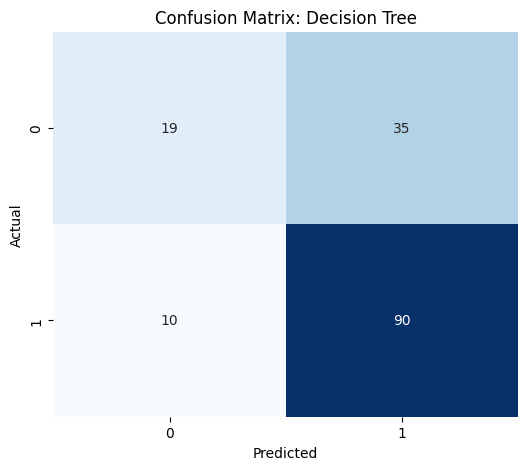

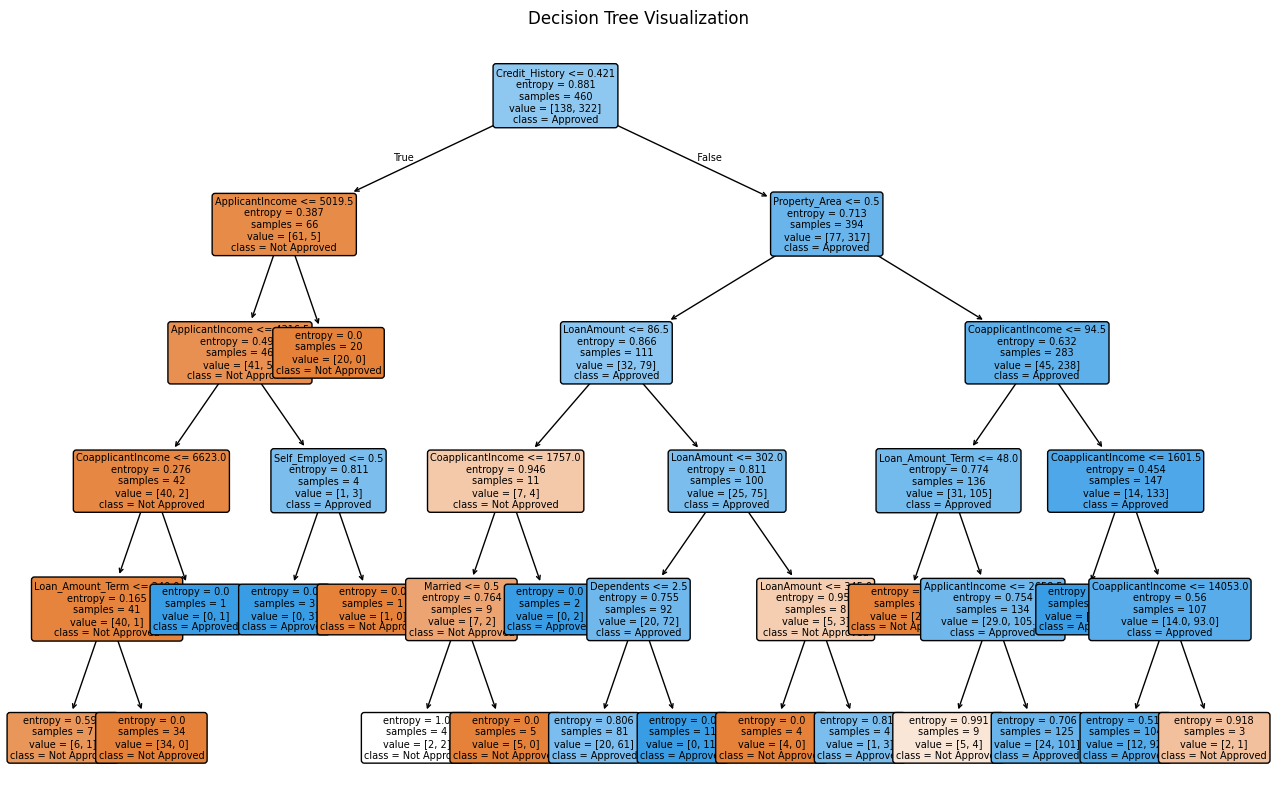


Predicted Loan Status for given input [1, 1, 0, 1, 0, 5000, 0, 120, 360, 1, 1]: 1


s:\TE\ML_pr\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [6]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the dataset
data = pd.read_csv("madfhantr.csv")
print("First 5 rows of the dataset:\n", data.head())

# Step 3: Data Preprocessing
print("\nChecking for missing values:\n", data.isnull().sum())

le = LabelEncoder()
for col in data.columns:
    #numerical values (Missing value Handling)
    if data[col].dtype in ['int64', 'float64']:  
        data[col] = data[col].fillna(data[col].mean())
    #categorical values(Missing value handling & label Encoding )
    else:  
        data[col] = data[col].fillna(data[col].mode()[0])
        data[col] = le.fit_transform(data[col])

print("\nData summary after preprocessing:\n")
print(data.head())

# Step 4: Split features and target
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

# Step 5: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"\nTraining samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Step 6: Create and train Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict on test data
y_pred = model.predict(X_test)

# Step 8: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", cr)

# Step 9: Visualize model performance (Confusion Matrix Heatmap)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Decision Tree")
plt.show()

# Step 10: Visualize the Decision Tree structure
plt.figure(figsize=(16,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True, rounded=True, fontsize=7)
plt.title("Decision Tree Visualization")
plt.show()

# Step 11: Make a sample prediction
sample_input = [[1,1,0,1,0,5000,0,120,360,1,1]]  # example customer data (encoded and same order as X)
predicted_class = model.predict([sample_input[0]])
print(f"\nPredicted Loan Status for given input {sample_input[0]}: {predicted_class[0]}")


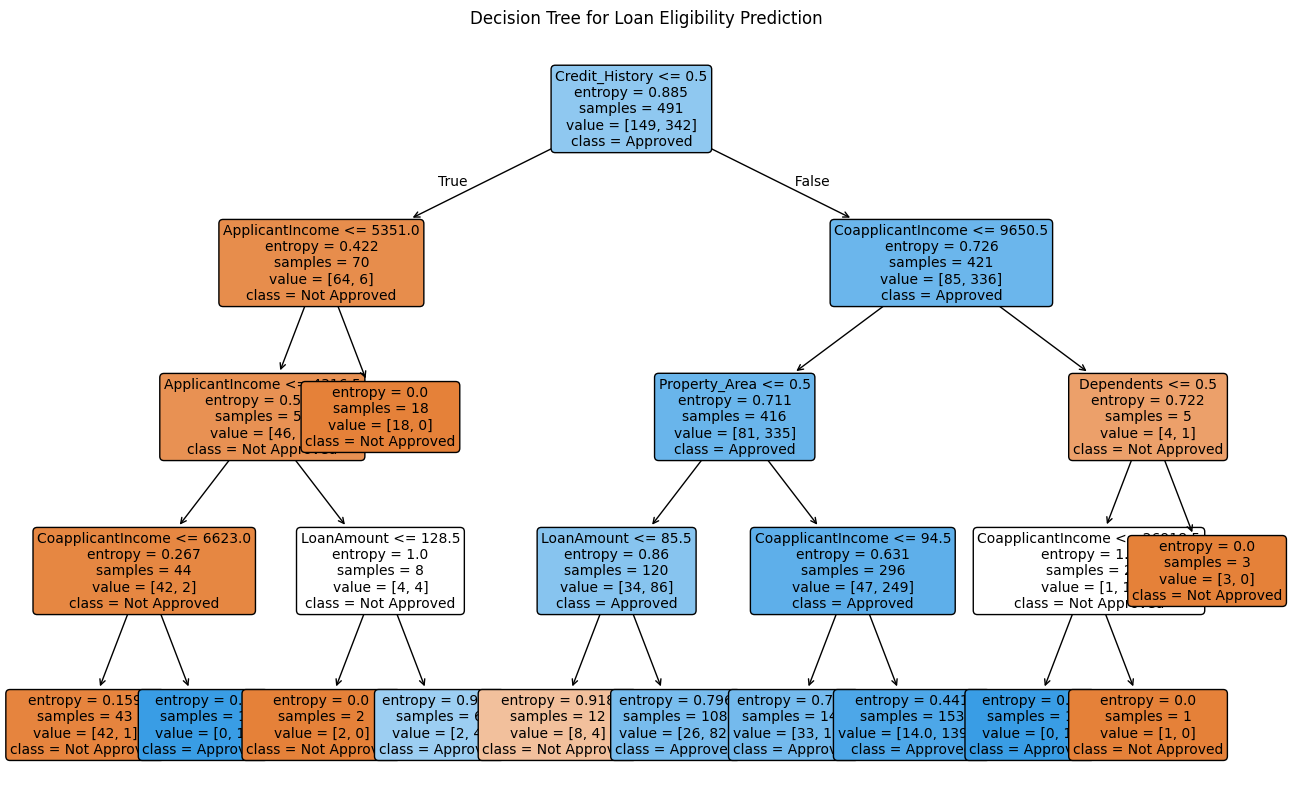

In [13]:
# Step 10: Visualize Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Approved', 'Approved'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Loan Eligibility Prediction")
plt.show()

In [14]:
#Show feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
display(importance)


Feature Importance:


,Feature,Importance
9,Credit_History,0.681050
6,CoapplicantIncome,0.142294
5,ApplicantIncome,0.066955
7,LoanAmount,0.059206
10,Property_Area,0.039500
2,Dependents,0.010995
0,Gender,0.000000
1,Married,0.000000
4,Self_Employed,0.000000
3,Education,0.000000


In [15]:
# Step 12: Predict loan approval for a new applicant (sample input)
sample_data = pd.DataFrame({
    'Gender': [1],              # 1 = Male (after encoding)
    'Married': [1],             # 1 = Married
    'Dependents': [0],          # 0 = No dependents
    'Education': [0],           # 0 = Graduate
    'Self_Employed': [0],       # 0 = Not self-employed
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [2000],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],      # 1 = Good credit history
    'Property_Area': [2]        # 2 = Urban
})

# Predict
prediction = model.predict(sample_data)[0]

# Display result
if prediction == 1:
    print("\nPrediction for Sample Applicant: Loan Approved")
else:
    print("\nPrediction for Sample Applicant: Loan Not Approved")




Prediction for Sample Applicant: Loan Approved
